In [3]:
from keras.datasets import fashion_mnist
from keras.models import Sequential,Model
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,Flatten,Reshape
import matplotlib.pyplot as plt
import numpy as np


In [4]:
#MNIST 데이터셋
(X_train,_),(X_test,_) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255


In [5]:
#생성자 모델
autoencoder = Sequential()

In [6]:
#인코딩 부분
autoencoder.add(Conv2D(16,kernel_size=3,padding='same',input_shape=(28,28,1),
                       activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,activation='relu',padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,strides=2,padding='same',
                       activation='relu'))


In [7]:
#디코딩 부분
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',
                       activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',
                       activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16,kernel_size=3,activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1,kernel_size=3,padding='same',
                       activation='sigmoid'))


In [10]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(X_train,X_train,epochs=500,batch_size=128,
                validation_data=(X_test,X_test))

Epoch 1/500
469/469 [==============================] - 3s 6ms/step - loss: 0.2741 - val_loss: 0.2746
Epoch 2/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2725 - val_loss: 0.2746
Epoch 3/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2725 - val_loss: 0.2749
Epoch 4/500
469/469 [==============================] - 2s 5ms/step - loss: 0.2724 - val_loss: 0.2746
Epoch 5/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2724 - val_loss: 0.2743
Epoch 6/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2723 - val_loss: 0.2744
Epoch 7/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2722 - val_loss: 0.2741
Epoch 8/500
469/469 [==============================] - 2s 5ms/step - loss: 0.2721 - val_loss: 0.2743
Epoch 9/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2721 - val_loss: 0.2741
Epoch 10/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2719 - val_lo

313/313 [==============================] - 1s 2ms/step


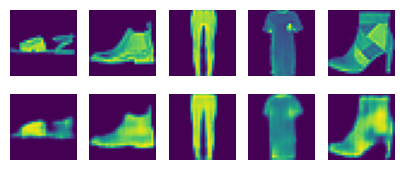

In [13]:
#학습된 결과를 출력
random_test = np.random.randint(X_test.shape[0],size=5)
ae_imgs = autoencoder.predict(X_test)
plt.figure(figsize=(7,2))#출력 이미지의 크기를 정합니다.
for i, image_idx in enumerate(random_test):
    #랜덤으로 뽑은 이미지를 차례로 나열합니다.
    ax =plt.subplot(2,7,i+1)
    #테스트할 이미지를 먼저 그대로 보여줍니다.
    plt.imshow(X_test[image_idx].reshape(28,28))
    ax.axis('off')
    ax = plt.subplot(2,7,7+i+1)
    #오토인코딩 결과를 다음 열에 입력합니다.
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    ax.axis('off')
plt.show()